## Part 1: Understanding Product Categories

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\lokes\Desktop\ironhack\week 2\day4\lab_test\amz_uk_price_prediction_dataset.csv")

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [5]:

df["category"].unique()


array(['Hi-Fi Speakers', 'CD, Disc & Tape Players', 'Wearable Technology',
       'Light Bulbs', 'Bathroom Lighting',
       'Heating, Cooling & Air Quality', 'Coffee & Espresso Machines',
       'Lab & Scientific Products', 'Smart Speakers',
       'Motorbike Clothing', 'Motorbike Accessories',
       'Motorbike Batteries', 'Motorbike Boots & Luggage',
       'Motorbike Chassis', 'Handmade Home & Kitchen Products',
       'Hardware', 'Storage & Home Organisation',
       'Fireplaces, Stoves & Accessories', 'PC Gaming Accessories',
       'USB Gadgets', 'Blank Media Cases & Wallets', 'Car & Motorbike',
       'Boys', 'Sports & Outdoors', 'Microphones', 'String Instruments',
       'Karaoke Equipment', 'PA & Stage',
       'General Music-Making Accessories', 'Wind Instruments',
       'Handmade Gifts', 'Fragrances', 'Calendars & Personal Organisers',
       'Furniture & Lighting', 'Computer Printers', 'Ski Goggles',
       'Snowboards', 'Skiing Poles', 'Downhill Ski Boots',
       'Hiki

In [6]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'

In [7]:
# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

In [8]:
freq_table = df["category"].value_counts().reset_index()
freq_table.columns = ["category", "count"]
print(freq_table)


                                   category   count
0                         Sports & Outdoors  836265
1                                    Beauty   19312
2    Handmade Clothing, Shoes & Accessories   19229
3                               Bath & Body   19092
4                            Birthday Gifts   18978
..                                      ...     ...
291                  Alexa Built-In Devices     107
292                       Motorbike Chassis     107
293                                   Plugs     107
294          Smart Home Security & Lighting     104
295                          Smart Speakers      54

[296 rows x 2 columns]


In [9]:
top5_categories = freq_table.head(5)
print(top5_categories)


                                 category   count
0                       Sports & Outdoors  836265
1                                  Beauty   19312
2  Handmade Clothing, Shoes & Accessories   19229
3                             Bath & Body   19092
4                          Birthday Gifts   18978


In [10]:
freq_counts = df["category"].value_counts()


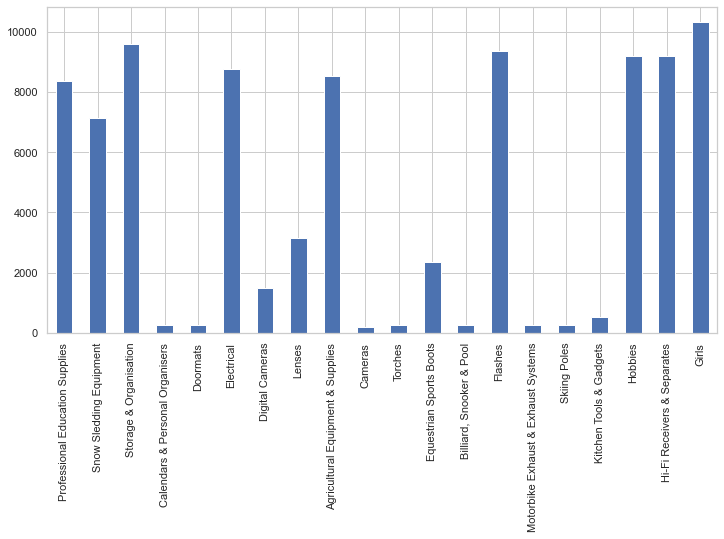

In [11]:
freq_counts.iloc[1:].sample(20).plot.bar()
plt.show()

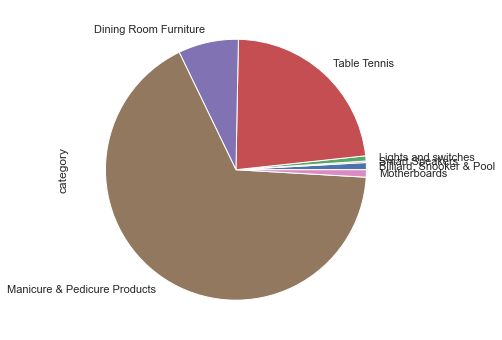

In [12]:
freq_counts.iloc[1:].sample(7).plot.pie()
plt.show()

## Part 2: Delving into Product Pricing

In [13]:
mean_price = df["price"].mean()
median_price = df["price"].median()
mode_price = df["price"].mode()[0]

print("Mean (Average) Price: ", round(mean_price, 2))
print("Median Price: ", round(median_price, 2))
print("Mode (Most Common) Price: ", round(mode_price, 2))


Mean (Average) Price:  89.24
Median Price:  19.09
Mode (Most Common) Price:  9.99


The average product price on Amazon UK is 89.24, but the most common price is just 9.99.
This suggests that while most items are affordably priced, a small number of high-value products significantly increase the average, indicating a right-skewed price distribution.

In [14]:
variance_price = df["price"].var()
std_dev_price = df["price"].std()
range_price = df["price"].max() - df["price"].min()
iqr_price = df["price"].quantile(0.75) - df["price"].quantile(0.25)

print("Variance: ", round(variance_price, 2))
print("Standard Deviation: ", round(std_dev_price, 2))
print("Range: ", round(range_price, 2))
print("Interquartile Range (IQR): ", round(iqr_price, 2))


Variance:  119445.49
Standard Deviation:  345.61
Range:  100000.0
Interquartile Range (IQR):  36.0


Product prices on Amazon UK are highly varied, ranging from a few pounds to tens of thousands.
While most items are clustered within an affordable range (around £10–£50), the very large standard deviation and range indicate the presence of significant price outliers.
This wide spread suggests that Amazon UK’s marketplace includes both low-cost everyday goods and premium or luxury products, creating a strongly right-skewed distribution.

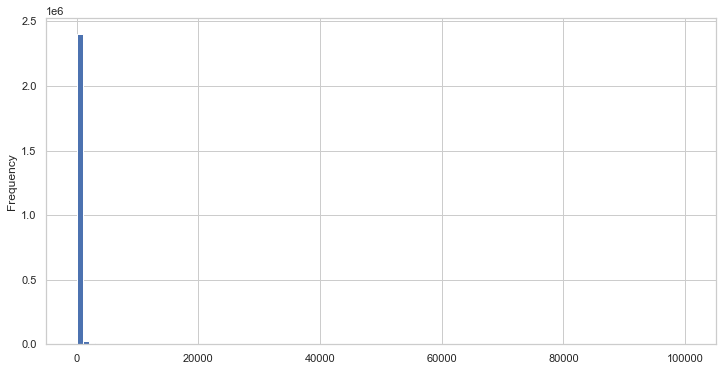

In [15]:
df["price"].plot.hist(bins=100)
plt.show()

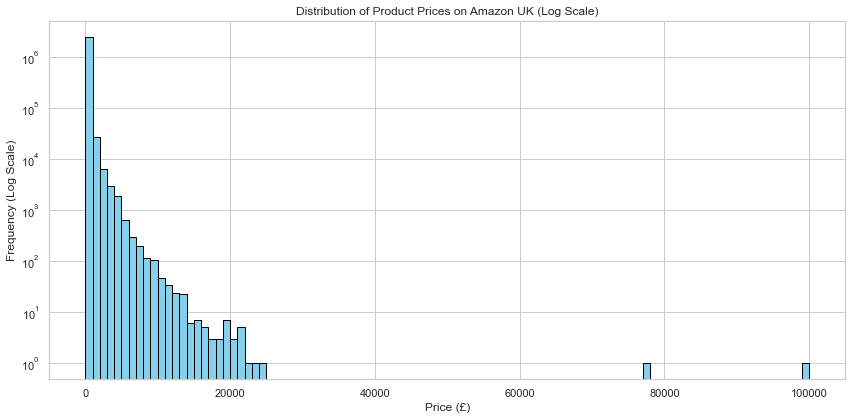

In [16]:


df["price"].plot.hist(bins=100, log=True, color="skyblue", edgecolor="black")

plt.title("Distribution of Product Prices on Amazon UK (Log Scale)")
plt.xlabel("Price (£)")
plt.ylabel("Frequency (Log Scale)")
plt.tight_layout()
plt.show()


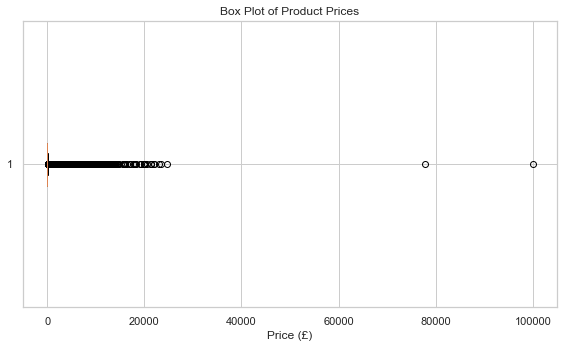

In [17]:
plt.figure(figsize=(8,5))
plt.boxplot(df["price"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title("Box Plot of Product Prices")
plt.xlabel("Price (£)")
plt.tight_layout()
plt.show()


## Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?


In [21]:
# Filter out rows with zero stars
filtered_data = df[df["stars"] != 0]

# Group by product (asin) and take one representative row per product
ratings = filtered_data.groupby("asin")["stars"].nth(1)

# Calculate central tendency measures
mean_rating = ratings.mean()
median_rating = ratings.median()
mode_rating = ratings.mode()[0]

print("Mean Rating:", round(mean_rating, 2))
print("Median Rating:", round(median_rating, 2))
print("Mode Rating:", round(mode_rating, 2))


Mean Rating: 4.37
Median Rating: 4.4
Mode Rating: 4.5


Customers generally give high ratings to products on Amazon UK. The mean (4.37), median (4.4), and mode (4.5) are all close together and near the top of the scale, showing that most customers are satisfied and tend to rate products positively, with a clear trend toward 4–5 star reviews.

In [24]:
variance_rating = ratings.var()
std_rating = ratings.std()
iqr_rating = ratings.quantile(0.75) - ratings.quantile(0.25)

print("Variance:", round(variance_rating, 2))
print("Standard Deviation:", round(std_rating, 2))
print("Interquartile Range (IQR):", round(iqr_rating, 2))


Variance: 0.22
Standard Deviation: 0.47
Interquartile Range (IQR): 0.4



The ratings show **very little variation** — with a **variance of 0.22**, **standard deviation of 0.47**, and **IQR of 0.4**, customer feedback is **highly consistent**. Most ratings cluster tightly around the high end (4–5 stars), indicating that customers generally rate products **similarly and positively**.


In [25]:
from scipy.stats import skew, kurtosis

skewness = skew(ratings.dropna())
kurt = kurtosis(ratings.dropna())

print("Skewness:", round(skewness, 2))
print("Kurtosis:", round(kurt, 2))


Skewness: -2.39
Kurtosis: 11.61


The ratings are not normally distributed — they show a strong left skew (skewness = -2.39) and are highly peaked (kurtosis = 11.61). This means most products receive very high ratings (4–5 stars), while low ratings are relatively rare.

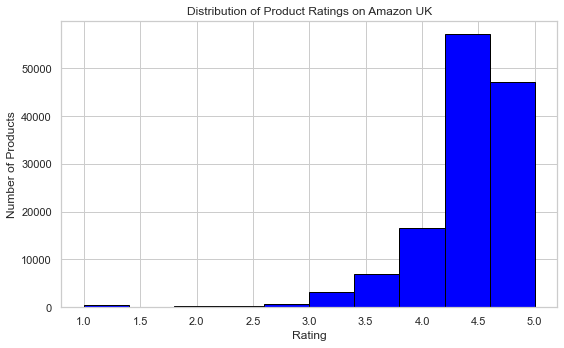

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(ratings, bins=10, color="blue", edgecolor="black")
plt.title("Distribution of Product Ratings on Amazon UK")
plt.xlabel("Rating")
plt.ylabel("Number of Products")
plt.tight_layout()
plt.show()


In this picture once agin we got clarified with leftskewness